In [1]:
#Import dependencies
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine

In [2]:
#Specify path and read in public health data from local CSV
ph_ind = "Data/Chi_Selected_PH_indicators_by_cmty_2005_2011.csv"
df_ph_ind = pd.read_csv(ph_ind)

In [3]:
#Sample of dataframe
df_ph_ind.head()

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,...,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,...,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,...,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,...,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,...,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5


In [4]:
#Display column names
df_ph_ind.columns

Index(['Community Area', 'Community Area Name', 'Birth Rate',
       'General Fertility Rate', 'Low Birth Weight',
       'Prenatal Care Beginning in First Trimester', 'Preterm Births',
       'Teen Birth Rate', 'Assault (Homicide)', 'Breast cancer in females',
       'Cancer (All Sites)', 'Colorectal Cancer', 'Diabetes-related',
       'Firearm-related', 'Infant Mortality Rate', 'Lung Cancer',
       'Prostate Cancer in Males', 'Stroke (Cerebrovascular Disease)',
       'Childhood Blood Lead Level Screening', 'Childhood Lead Poisoning',
       'Gonorrhea in Females', 'Gonorrhea in Males', 'Tuberculosis',
       'Below Poverty Level', 'Crowded Housing', 'Dependency',
       'No High School Diploma', 'Per Capita Income', 'Unemployment'],
      dtype='object')

In [5]:
#Display datatypes of each column
df_ph_ind.dtypes

Community Area                                  int64
Community Area Name                            object
Birth Rate                                    float64
General Fertility Rate                        float64
Low Birth Weight                              float64
Prenatal Care Beginning in First Trimester    float64
Preterm Births                                float64
Teen Birth Rate                               float64
Assault (Homicide)                            float64
Breast cancer in females                      float64
Cancer (All Sites)                            float64
Colorectal Cancer                             float64
Diabetes-related                              float64
Firearm-related                               float64
Infant Mortality Rate                         float64
Lung Cancer                                   float64
Prostate Cancer in Males                      float64
Stroke (Cerebrovascular Disease)              float64
Childhood Blood Lead Level S

In [6]:
#Condense dataframe to only the columns needed
df_ph_condense = df_ph_ind[["Community Area", "Community Area Name", "Unemployment", "No High School Diploma"]].copy()

In [7]:
#Remove records with empty values in 'Community Area' field (this field is primary key and cannot have NA's)
df_ph_condense = df_ph_condense.dropna(subset=["Community Area"])

In [8]:
#Change datatype of 'Community Area' into string to make it a categorical variable
df_ph_condense = df_ph_condense.astype({"Community Area": "str"})

In [9]:
#Rename columns to fit those that will be in SQL table
df_ph_condense = df_ph_condense.rename(columns={"Community Area": "community_area", "Community Area Name": "community_area_name", "Unemployment": "unemployment",
                                                "No High School Diploma": "no_high_school_diploma"})

In [10]:
#Sample of transformed dataframe
df_ph_condense.head()

,community_area,community_area_name,unemployment,no_high_school_diploma
0,1,Rogers Park,7.5,18.1
1,2,West Ridge,7.9,19.6
2,3,Uptown,7.7,13.6
3,4,Lincoln Square,6.8,12.5
4,5,North Center,4.5,5.4


In [11]:
#Specify path and read in second dataframe
crime = "Data/Chi_Crimes2018_All.csv"
df_crime = pd.read_csv(crime)

In [12]:
#Sample of dataframe
df_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11556487,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,-87.696064,"(41.689078832, -87.696064026)",33.0,"4,447",73.0,256.0,42.0,33.0,9.0,254.0
1,11561837,JC110056,12/31/2018 11:59:00 PM,013XX W 72ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,-87.657709,"(41.763181359, -87.657709477)",17.0,"22,257",65.0,408.0,32.0,23.0,17.0,216.0
2,11552699,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,-87.647391,"(41.740520866, -87.647390719)",18.0,"21,554",70.0,530.0,13.0,59.0,20.0,233.0
3,11552724,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,0440,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,...,-87.657625,"(41.857068095, -87.657625201)",8.0,"14,920",33.0,365.0,26.0,43.0,15.0,150.0
4,11552731,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,-87.647717,"(41.75191443, -87.647716532)",17.0,"21,554",70.0,487.0,31.0,59.0,20.0,229.0


In [13]:
#Check columns of dataframe
df_crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')

In [14]:
#Condense dataframe to only the columns needed
df_crime_condense = df_crime[["ID", "Primary Type","Community Area" ]]

In [15]:
df_crime_condense.head()

,ID,Primary Type,Community Area
0,11556487,CRIMINAL DAMAGE,74.0
1,11561837,DECEPTIVE PRACTICE,67.0
2,11552699,CRIMINAL DAMAGE,71.0
3,11552724,BATTERY,31.0
4,11552731,BATTERY,71.0


In [16]:
#Presence of zeroes in 'Community Area' must be dealt with -- this value is nonsensical and is equaivalent to NA
df_crime_condense.sort_values('Community Area').head()

,ID,Primary Type,Community Area
103615,11411592,NARCOTICS,0.0
211341,11271124,BATTERY,0.0
88958,11431392,NARCOTICS,1.0
50728,11482857,MOTOR VEHICLE THEFT,1.0
125920,11381685,BATTERY,1.0


In [17]:
#Find indices where 'Community Area' = 0
variable = df_crime_condense[df_crime_condense["Community Area"]==0].index
variable

Int64Index([103615, 211341], dtype='int64')

In [18]:
#Drop records where 'Community Area' = 0; display sample of dataframe
df_crime_condense.drop(variable, inplace=True)
df_crime_condense.sort_values(by=['Community Area']).head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,ID,Primary Type,Community Area
240478,11228502,CRIMINAL DAMAGE,1.0
239565,11229985,THEFT,1.0
177656,11315019,THEFT,1.0
53338,11492323,NARCOTICS,1.0
177652,11314763,THEFT,1.0


In [19]:
#Remove records where 'Community Area' is NA
df_crime_condense = df_crime_condense[np.isfinite(df_crime_condense["Community Area"])]

In [20]:
#Check datatypes of column; 'Community Area' is currently a float; 
#needs to be made into a string of an integer in order to be a merge-able primary key
df_crime_condense.dtypes

ID                  int64
Primary Type       object
Community Area    float64
dtype: object

In [21]:
#Multiple steps required to change datatype from float to a string of an integer value
df_crime_condense = df_crime_condense.astype({"Community Area": "float"})
df_crime_condense = df_crime_condense.astype({"Community Area": "int"})
df_crime_condense = df_crime_condense.astype({"Community Area": "str"})

In [22]:
#'Community Area' field now has no decimal
df_crime_condense.head()

,ID,Primary Type,Community Area
0,11556487,CRIMINAL DAMAGE,74
1,11561837,DECEPTIVE PRACTICE,67
2,11552699,CRIMINAL DAMAGE,71
3,11552724,BATTERY,31
4,11552731,BATTERY,71


In [23]:
#Crime data grouped by community area to find total number of crimes per community area;
#Use indexing as a way of 'converting' GroupBy object into DataFrame
grouped_crime = df_crime_condense.groupby("Community Area", as_index=False).count()[["Community Area", "Primary Type" ]]

In [24]:
#Rename columns to those that would be in SQL table
grouped_crime = grouped_crime.rename(columns={"Community Area": "community_area", "Primary Type": "number_of_crimes"})

In [25]:
#Sample of dataframe
grouped_crime.head()

,community_area,number_of_crimes
0,1,3816
1,10,1175
2,11,1098
3,12,494
4,13,1000


In [26]:
data_file_3 = "Data/Chi_Population2017.csv"

In [27]:
df_pop = pd.read_csv(data_file_3)
df_pop.head()

,Community Area,Population
0,1,53470
1,2,75185
2,3,54001
3,4,46881
4,5,35406


In [28]:
df_pop_temp = df_pop.astype({"Community Area": "str"})

In [29]:
df_pop_final = df_pop_temp.astype({"Population": "str"})

In [30]:
df_pop_final.dtypes

Community Area    object
Population        object
dtype: object

In [31]:
df_pop_final = df_pop_final.rename(columns={"Community Area": "community_area", "Population": "population"})

In [32]:
rds_connection_string = "postgres:postgres@localhost:5432/chicago_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [33]:
engine.table_names()

['public_health', 'chicago_crime', 'population']

In [34]:
df_ph_condense.to_sql(name='public_health', con=engine, if_exists='append', index=False)

In [35]:
grouped_crime.to_sql(name='chicago_crime', con=engine, if_exists='append', index=False)

In [36]:
df_pop_final.to_sql(name='population', con=engine, if_exists='append', index=False)

In [37]:
master_table = pd.read_sql_query('''SELECT ph.*, c.number_of_crimes, p.population FROM public_health ph
JOIN chicago_crime c ON ph.community_area = c.community_area JOIN population p
ON ph.community_area = p.community_area''', 
con=engine)



master_table.head()

,community_area,community_area_name,unemployment,no_high_school_diploma,number_of_crimes,population
0,1,Rogers Park,7.5,18.1,3816,53470
1,1,Rogers Park,7.5,18.1,3816,53470
2,1,Rogers Park,7.5,18.1,3816,53470
3,1,Rogers Park,7.5,18.1,3816,53470
4,1,Rogers Park,7.5,18.1,3816,53470


In [38]:
master_table.dtypes

community_area             object
community_area_name        object
unemployment              float64
no_high_school_diploma    float64
number_of_crimes            int64
population                 object
dtype: object

In [39]:
master_table = master_table.astype({"population": "int64"})

In [40]:
master_table["crimes_per_thousand"] = (master_table.number_of_crimes/master_table.population) * 1000

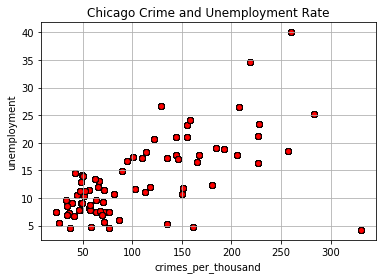

In [41]:
# Build the scatter plots for Crime rate and Unemployment
plt.scatter(master_table.crimes_per_thousand, master_table.unemployment, 
            c="red", edgecolor="black", linewidths=1, marker="o", alpha=0.8)


# Incorporate the other graph properties
plt.title("Chicago Crime and Unemployment Rate")
plt.ylabel("unemployment")
plt.xlabel("crimes_per_thousand")
plt.grid(True)


# Save Figure
plt.savefig("Analysis/Crime_Unemployment.png")

# Show plot
plt.show()

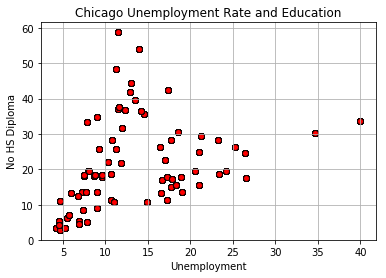

In [42]:
# Build the scatter plots for Unemployment and Education (No HS diploma) 
plt.scatter(master_table.unemployment, master_table.no_high_school_diploma, 
            c="red", edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("Chicago Unemployment Rate and Education")
plt.ylabel("No HS Diploma")
plt.xlabel("Unemployment")
plt.grid(True)


# Save Figure
plt.savefig("Analysis/Education_Unemployment.png")

# Show plot
plt.show()